In [33]:
import pandas as pd
import geopandas as gp
import fiona
import numpy as np
import choroplethNYC as cp
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
df = pd.read_csv('precinct_pop_m.csv')

In [3]:
df.head(2)

,precinct_me,total_pop2014,total_pop2015,total_pop2016,total_pop2017,model_14,model_15,model_16,model_17
0,1.0,72080,73317,74817,75871,172.545680,174.010291,176.831352,177.267201
1,5.0,49233,50020,49910,50839,117.854349,118.717279,117.963200,118.781711


In [6]:
url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)
precinct.head(2)

,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...


In [12]:
precinct = precinct.merge(df, left_on='precinct', right_on='precinct_me', how='left')

In [14]:
precinct.head(2)

,precinct,shape_area,shape_leng,geometry,precinct_me,total_pop2014,total_pop2015,total_pop2016,total_pop2017,model_14,model_15,model_16,model_17
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,1.0,72080,73317,74817,75871,172.545680,174.010291,176.831352,177.267201
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...,5.0,49233,50020,49910,50839,117.854349,118.717279,117.963200,118.781711


/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Number of Patrol Officers')

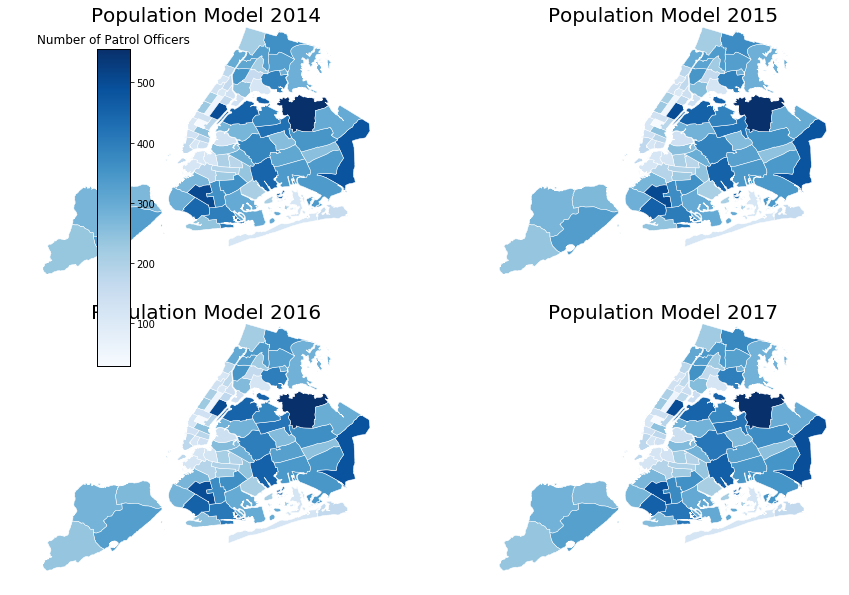

In [61]:
#mpl.rcParams['savefig.pad_inches'] = 0

f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey=True, 
                                sharex=True, figsize=(15,10), frameon=False)

ax1.autoscale(tight=True)
ax2.autoscale(tight=True)
ax3.autoscale(tight=True)
ax4.autoscale(tight=True)

cp.choroplethNYC(precinct, column='model_14', ax=ax1, cmap="Blues", edgecolor="white",lw=.5)
cp.choroplethNYC(precinct, column='model_15', ax=ax2, cmap="Blues", edgecolor="white",lw=.5)
cp.choroplethNYC(precinct, column='model_16', ax=ax3, cmap="Blues", edgecolor="white", lw=.5)
cp.choroplethNYC(precinct, column='model_17', ax=ax4, cmap="Blues", edgecolor="white",lw=.5)

ax1.set_title('Population Model 2014',fontsize=(20))
ax2.set_title('Population Model 2015' ,fontsize=(20))
ax3.set_title('Population Model 2016',fontsize=(20))
ax4.set_title('Population Model 2017' ,fontsize=(20))

plt.title('Number of Patrol Officers')

Text(0.5,1,'Population Model 2017')

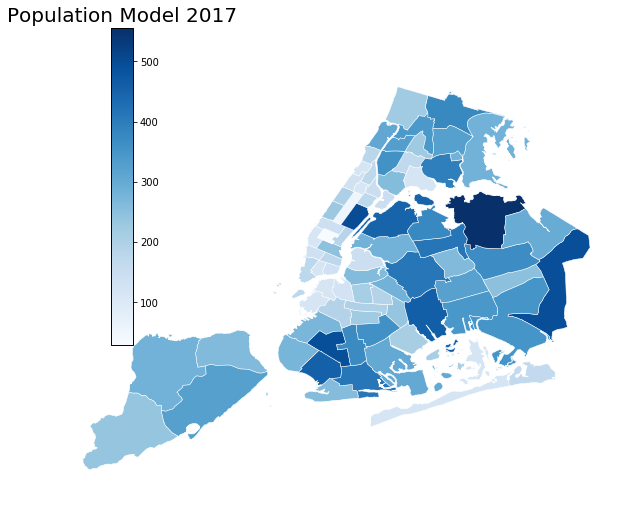

In [65]:
cp.choroplethNYC(precinct, column='model_17', cmap="Blues", edgecolor="white",lw=.5)
plt.title('Population Model 2017' ,fontsize=(20))
